<a href="https://colab.research.google.com/github/shinyasyokukai/AIC/blob/main/AIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 注意
このノートは現状  
https://nbviewer.org/github/genkuroki/Statistics/blob/master/KL%20information%20and%20descriptive%20statistics.ipynb  
と  
https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf  
の丸パクリ (というか超絶劣化版) である。  
あとマークダウンの練習のために無駄にいっぱい数式書いてます。  
最終的には AIC について基本的なことをまとめて具体的な例で実験したい。  
public にしたくなかったけど colab から push するためにしょうがなかった。  
private なリポジトリだと共有するのめんどいし。  
恥ずかしいので発表終わったら速やかに private にします。

# スターリングの公式
$$
\begin{align}
n! &= n^ne^{-n}\sqrt{2\pi n}(1 + o(1)) \quad (n\rightarrow∞)\\
⇔\ln n! &= n\ln n - n + \frac{1}{2}\ln n + \ln\sqrt{2\pi} + o(1) \quad (n\rightarrow∞)
\end{align}
$$
特に
$$
\ln n! = n\ln n - n + O(\ln n)
$$
となる。  
最後の評価は荒いが、今回はこれで十分。  
また、
$$
\begin{align}
\sum_{x = 1}^n\ln x &= \ln n!\\
\int_1^n\ln x\mathrm{d}x &= n\ln n - n + 1
\end{align}
$$
より、最後の評価は対数関数の積分を和で近似した際の誤差のオーダーが $\ln n$ であることを示している。
# KL 情報量
確率分布 $p$ の確率分布 $q$ に対する KL 情報量 $D(q||p)$ を
$$
D(q||p) := ∫q(x)\ln{\frac{q(x)}{p(x)}}\mathrm{d}x
$$
で定義する。
$$
\begin{align}
D(q||p) &= \left(-∫q(x)\ln p(x)\mathrm{d}x\right) -\left(-∫q(x)\ln q(x)\mathrm{d}x\right)\\
&= G(q||p) - S(q)
\end{align}
$$
と書ける。ここに、
$$
\begin{align}
G(q||p) &:= -∫q(x)\ln p(x)\mathrm{d}x\\
S(q) &:= -∫q(x)\ln q(x)\mathrm{d}x 
\end{align}
$$
である。$G(q||p)$ を $p$ の $q$ に対する交差エントロピー、もしくは汎化誤差と呼び、$S(q)$ をシャノンエントロピー$^{[\mathrm{注}1]}$と呼ぶ。  

シャノンエントロピー $S(q)$ は " $q$ に従って発生する記号列を (適切に) 符号化した際の平均符号長" 、交差エントロピー $G(q||p)$ は " $q$ に従って発生する記号列を $p$ に従うと考えて記号化した時の平均符号長" と解釈される。  
よって KL 情報量 $D(q||p)$ は "実際には $q$ に従って発生する記号列を $p$ に従うとして符号化した際の平均符号長のロス" と解釈できる (ただし $p$, $q$ が離散的な場合に限る)。  
また、$-\ln p(x)$ が " $p$ に従う確率変数 $X$ について、$X = x$ と知らされたときに受け取る情報量" であったことを思い出そう。改めて
$$
D(q||p) = -∫q(x)[\{-\ln q(x)\} - \{-\ln p(x)\}]\mathrm{d}x
$$
と書き、$p$ を事前分布、$q$ を事後分布と見なせば、$D(q||p)$ は "事前分布 $p$ を 事後分布 $q$ に更新することで、$X$ の値を知って受け取る情報量が平均的にどれだけ減ったか" を表すとも考えられる。  
これらの解釈でも $D(q||p)$ が $q$ と $p$ の違いを測るものであることはなんとなく了解されると思うが、 $q$ を $p$ で近似するという立場からより直接的な意味付けを以下に与える。
# Sanov の定理による KL 情報量の意味付け
### Sanov の定理$^{[\mathrm{注}2]}$
$p$, $q$を確率分布とし、$X_1,X_2,…$ が $p$ に従う独立同分布な確率変数列であるとする。このとき "$X_1,…,X_n$ が $q$ に従うように見える確率" は
$$
\exp(-nD(q||p) + o(n))
$$
となる。つまり、KL 情報量 $D(q||p)$ は $p$ に従う乱数列が $q$ に従うように見える確率の対数が減衰する速さである。
### 証明
一般の場合の証明は大変 (というか僕も知らない) なので $p$, $q$ ともに有限台の離散確率分布とする。  
すなわち、有限集合 $\{1,…,r\}$ 上の非負値関数で
$$
\begin{align}
\sum_{i=1}^{r}p_i &= 1,\\
\sum_{i=1}^{r}q_i &= 1 
\end{align}
$$
を満たすものを考える。  
また簡単のため、任意の $i$ について $p_i,q_i>0$ とする。  
$(X_n)_{n=1}^∞$ を $p$ に従う独立同分布な確率変数列とする。  
$n$ を正整数とする。$\sum_{i = 1}^rk_i=n$ を満たす非負整数列 $(k_i)_{i=1}^r$ を与える。
$$
k_i=\#\{m≤n|X_m=i\} \quad (i = 1,…,r)
$$ 
となる (すなわち値 $i$ がちょうど $k_i$ 回観測される) 確率は
$$
\frac{n!}{k_1!…k_r!}p_1^{k_1}…p_r^{k_r}
$$
となる。  
ここで、$k_i = nq_i(1 + O(\frac{\ln{n}}{n})) = nq_i + O(\ln n)$ であると仮定する。  
このとき特に $\frac{k_i}{n}→q_i\quad(n→∞)$ となる (つまり $(X_n)_{n=1}^∞$ がまるで $q$ に従うように見える)。  
スターリングの公式より
$$
\begin{align}
  \ln n! &= n\ln n - n + O(\ln n)\\
  \ln k_i! &= k_i\ln k_i - k_i + O(\ln k_i)\\
  &=k_i\ln k_i - k_i + O(\ln n)\\
  \ln p_i^{k_i} &= k_i\ln p_i
\end{align}
$$
また、仮定より
$$
\begin{align}
  \ln \frac{k_i}{n} &= \ln q_i + \ln \left(1 + O\left(\frac{\ln{n}}{n}\right)\right)\\
  &= \ln q_i + O\left(\frac{\ln{n}}{n}\right)
\end{align}
$$
ゆえに、仮定と合わせて
$$
\begin{align}
  \ln\frac{n!}{k_1!…k_r!}p_1^{k_1}…p_r^{k_r} &= n\ln n - k_1\ln k_1 - … - k_r\ln k_r + k_1\ln p_1 + … + k_r\ln p_r + O(\ln n)\\
  &= - k_1\left(\ln\frac{k_1}{n} - \ln p_1\right) - … - k_r\left(\ln\frac{k_r}{n} - \ln p_r\right) + O(\ln n)\\
  &= - k_1\left(\ln q_1 - \ln p_1\right) - … - k_r\left(\ln q_r - \ln p_r\right) + O(\ln n)\\
  &= - nq_1\ln\frac{q_1}{p_1} - … - nq_r\ln\frac{q_r}{p_r} + O(\ln n)\\
  &=-nD(q||p) + o(n)
\end{align}
$$
従って、"$X_1,…,X_n$ が $q$ に従うように見える確率" は
$$
\exp(-nD(q||p) + o(n))
$$
となる (証明終)。
### 注意
通常 $0\ln 0=0$ と約束するので、$q_i=0$ となる $i$ があっても上の評価は問題なく成立する。  
しかし $q_i>0$ かつ $p_i=0$ なる $i$ があると $D(q||p) = ∞$ となり、上の評価は破綻する。  
これは、$i$ の目が絶対出ないサイコロを $i$ の目が出るサイコロでたまたまシミュレートすることはできても、$i$ の目が出るサイコロを $i$ の目が出ないサイコロでシミュレートすることはできないことに対応する...のだと思う。
# KL 情報量の諸性質
KL 情報量の重要な性質として非負値性と非退化性を示す。
$$
\begin{align}
  &(\mathrm{非負値性})\quad D(q||p) ≥ 0\\
  &(\mathrm{非退化性})\quad D(q||p)= 0 ⇔ p = q
\end{align}
$$
### 証明
$$
\begin{align}
  D(q||p) &= ∫q(x)\ln{\frac{q(x)}{p(x)}}\mathrm{d}x\\
          &= ∫q(x)\left(-\ln{\frac{p(x)}{q(x)}}\right)\mathrm{d}x\\
          &≥ -\ln\left(∫q(x){\frac{p(x)}{q(x)}}\mathrm{d}x\right)\\
          &= -\ln\left(∫p(x)\mathrm{d}x\right)\\
          &= -\ln 1\\
          &= 0
\end{align}
$$
ここで、3 行目の変形には「 $t \mapsto - \ln t$ が下に凸であること」と、Jensen の不等式を用いた。  
また、$t \mapsto - \ln t$ は狭義凸であるので、等号成立条件は
$$
\frac{p(x)}{q(x)} ≡ \mathrm{const}.
$$
となるが、$∫p(x)\mathrm{d}x = ∫q(x)\mathrm{d}x = 1$ からこれは $p = q$ と同値である (証明終)。   
以上の結果より、KL 情報量 $D(q||p)$ は確率分布 $p$, $q$ 間の距離のようなものである。  
ただし、対称性 ($D(q||p) = D(p||q)$) や三角不等式 ($D(p||q) \leq D(p||r) + D(r||q)$) は一般には成り立たない。  
適切な定式化の元で三平方の定理が成立するため、どちらかといえば距離の二乗に相当する量である$^{[\mathrm{注}3]}$。
# 例
### 1. 正規分布
$$
\begin{align}  
  q(x) &= \frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left\{-\frac{(x-\mu_0)^2}{2\sigma_0^2}\right\}\\
  p(x) &= \frac{1}{\sqrt{2\pi\sigma_1^2}}\exp\left\{-\frac{(x-\mu_1)^2}{2\sigma_1^2}\right\}
\end{align}
$$
として、KL 情報量 $D(q||p)$ を求める。
$$
\begin{align}  
  D(q||p) &= ∫q(x)\ln{\frac{q(x)}{p(x)}}\mathrm{d}x\\
          &= ∫q(x)\ln q(x)\mathrm{d}x -∫q(x)\ln p(x)\mathrm{d}x\\
\end{align}
$$
ここで、
$$
\begin{align}  
  ∫q(x)\ln p(x)\mathrm{d}x &= ∫q(x) \ln \frac{1}{\sqrt{2\pi\sigma_1^2}} \mathrm{d}x - ∫q(x)\frac{(x-\mu_1)^2}{2\sigma_1^2}\mathrm{d}x\\
          &= -\frac{1}{2}\ln 2\pi\sigma_1^2 - \frac{1}{2\sigma_1^2}\left\{∫q(x)(x-\mu_0)^2 \mathrm{d}x + 2(\mu_0-\mu_1)∫q(x)(x-\mu_0)\mathrm{d}x + ∫q(x)(\mu_0-\mu_1)^2\mathrm{d}x \right\}\\
          &= -\frac{1}{2}\ln 2\pi\sigma_1^2 - \frac{\sigma_0^2+(\mu_0-\mu_1)^2}{2\sigma_1^2}
\end{align}
$$
より、
$$
\begin{align}  
  D(q||p) &= \left\{-\frac{1}{2}\ln 2\pi\sigma_0^2 - \frac{\sigma_0^2+(\mu_0-\mu_0)^2}{2\sigma_0^2}\right\}-\left\{-\frac{1}{2}\ln 2\pi\sigma_1^2 - \frac{\sigma_0^2+(\mu_0-\mu_1)^2}{2\sigma_1^2}\right\}\\
          &= \frac{1}{2} \left\{\ln\frac{\sigma_1^2}{\sigma_0^2} + \frac{\sigma_0^2+(\mu_0-\mu_1)^2}{\sigma_1^2} -1 \right\}\\
\end{align}
$$
となる。
### 2. ベルヌーイ分布
$$
\begin{align}  
  q(x=0) &= q\\
  q(x=1) &= 1-q\\
  p(x=0) &= p\\
  p(x=1) &= 1-p\\
\end{align}
$$
とすると、KL 情報量 $D(q||p)$ は
$$ 
  D(q||p) = q\ln \frac{q}{p} + (1-q)\ln \frac{1-q}{1-p}
$$
となる。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


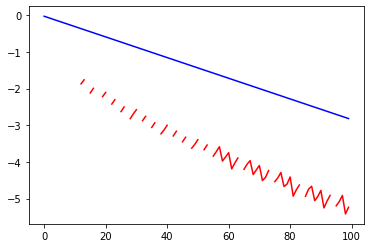

In [2]:
# 表が出る確率 p のコインで表が出る確率 q のコインをシミュレートして、Sanov の定理を確認する
import numpy as np
from matplotlib import pyplot as plt

p = 0.2
q = 0.3
C = 0.1
N = 10000000
max_size = 100

def flip(p):
  if np.random.rand() < p:
    return 1
  else:
    return 0

def split(data, size):
  num = data.shape[0] // size
  return np.array([data[i*size:(i+1)*size] for i in range(num)])

def kl_div(q, p):
  return q * np.log(q / p) + (1 - q) * np.log((1 - q) / (1 - p))

def is_near(x, y, n):
  return np.abs(x - y) < C * np.log(n) / n

flip_result = np.array([flip(p) for n in range(N)])

log_probs = []

for size in range(1, max_size + 1):

  means = np.mean(split(flip_result, size), axis=1)
  sample_size = means.shape[0]
  log_prob = np.log(sum([is_near(means[i], q, size) for i in range(sample_size)])) - np.log(sample_size)
  log_probs.append(log_prob)

log_probs = np.array(log_probs)
plt.plot(log_probs, color='red')
plt.plot(np.array([- kl_div(q, p) * size for size in range(1, max_size + 1)]), color='blue')

# 注釈
### 注1:
KL 情報量 $D(q||p)$ は離散・連続にかかわらず一般の確率測度 $p$, $q$ に対し、ラドン＝ニコディム微分を用いて
$$
D(q||p) = ∫\left(\ln \frac{\mathrm{d}q}{\mathrm{d}p}\right)\mathrm{d}q
$$
と定義できる。これはシャノンエントロピーが
$$
\begin{align}
S_{\mathrm{discrete}}(q) &:= -\sum_x q(x)\ln q(x)\\
S_{\mathrm{continuous}}(q) &:= -∫q(x)\ln q(x)\mathrm{d}x 
\end{align}
$$
と離散・連続の場合で別々に定義されたのとは対照的である。  
また、$q$ が $\{1,…,r\}$ にしか値を持たないなら、
$$
S_{\mathrm{discrete}}(q) = \ln r - D(q||p_{\mathrm{uniform}})
$$
と書ける。ここに、$p_{\mathrm{uniform}}$ は $\{1,…,r\}$ 上の一様分布である。  
連続の場合も同様にシャノンエントロピーを一様分布との KL 情報量で表すことができる (ただし、$\mathbf{Z}$ や $\mathbf{R}$ 上の一様分布は存在しないため、この説明はいささかずるい)。  
ゆえに KL 情報量はシャノンエントロピーよりも基本的な量であると考えられる。
### 注2:
Sanov の定理は大偏差原理と呼ばれるものの一種である。  
大偏差原理とは以下のような

### 注3:
確率分布族をなめらかな図形 (統計多様体) とみなし、その上の幾何学を考える分野を情報幾何という。  
そこでは 1 つの確率分布は図形上の 1 点とみなされ、KL 情報量は 2 点間の距離の二乗に相当する。  
また、同じ点における接ベクトル間の内積がフィッシャー情報行列というもので与えられる。  
内積があれば角度が考えられ、直角三角形を考えることで KL 情報量についての三平方の定理が得られる。  
さらに、フィッシャー情報行列は KL 情報量のヘッシアンに相当する (テイラー展開における 2 次の項になる) こともわかる。